# Homework 7

## Create a Data Visualization following the professor's guidelines.

### First import packages and ensure environmental variables are working.

In [12]:
# set working environment
import pandas as pd
import os
import pylab as pl
import statsmodels.api as sm
%pylab inline

if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")

PUIDATA = os.getenv("PUIDATA")

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['title']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [13]:
PUIDATA = "/home/cusp/kal573/PUIdata"

### Obtain Dataset

This dataset was downloaded from <https://wonder.cdc.gov/nasa-nldas.html> and <https://wonder.cdc.gov/controller/datarequest/D104;jsessionid=1621735AAA372EC75BDCB7E29779F958>, which are a part of the Center for Disease Control's WONDER online database.

I saved the downloaded text file as a CSV, and uploaded it into the PUIdata directory.


In [14]:
# use pandas to read the csv
data = pd.DataFrame.from_csv(PUIDATA + "/heat_wave.csv")
print data.columns

Index([u'year', u'days', u'avg', u'temp'], dtype='object')


In [15]:
# explore data columns
data.head()

,year,days,avg,temp
index,,,,
1,1990,2,0.03,54.07
2,1991,507,8.18,54.33
3,1992,0,0.00,50.86
4,1993,388,6.26,51.53
5,1994,410,6.61,51.60


### Create linear regression model of temperature data points

In [16]:
# use statsmodels to create linear regression line of data
X1 = sm.add_constant(data['year'])
linmodel = sm.OLS(data['temp'], X1).fit()

### Data Visualization: Plot

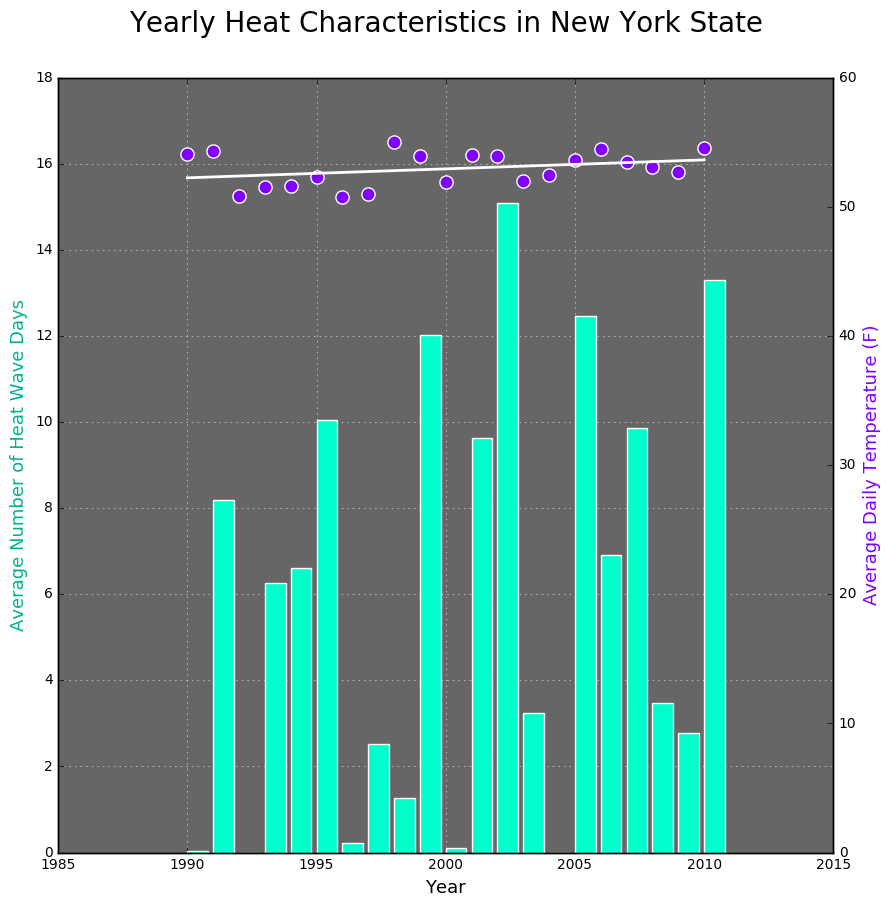

In [17]:
#plot data
pl.figure(figsize(10,10))
fig, ax1 = pl.subplots()
ax1.set_axis_bgcolor('#666666')
ax2 = ax1.twinx()
ax1.bar(data['year'], data['avg'],  color = '#00ffcc', edgecolor = 'white')
ax2.scatter(data['year'], data['temp'], s = 90, facecolor = '#8000ff', edgecolor = 'white')
pl.plot(data['year'], linmodel.predict(), color = 'white', lw = 2)
pl.xlim(1985,2015)
ax1.set_ylim([0,18])
ax2.set_ylim([0,60])
ax1.xaxis.grid(True)
ax1.set_axisbelow(True)
ax1.grid(color = '#e6e6e6')
title = pl.title("Yearly Heat Characteristics in New York State", fontsize = 20)
title.set_position([.5, 1.05])
ax1.set_xlabel('Year', color = 'k', fontsize = 13)
ax1.set_ylabel('Average Number of Heat Wave Days', color = '#00b38f', fontsize = 13)
ax2.set_ylabel('Average Daily Temperature (F)', color = '#8000ff', fontsize = 13)